<a href="https://colab.research.google.com/github/AyaTaha16/Generative_AI_DEPI/blob/main/Heartbeat_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECG Heartbeat Categorization**

**Problem Undestanding**

**The Problem: Heartbeat Classification**

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

**Dataset** : "Arrhythmia Dataset"
- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [ ]:
classes = {0:'Normal beat',
           1:'Supraventricular premature beat',
           2:'Premature ventricular contraction',
           3:"Fusion of ventricular and normal beat",
           4:'Unclassifiable beat'}

#Data Loading

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 94% 93.0M/98.8M [00:00<00:00, 132MB/s]
100% 98.8M/98.8M [00:00<00:00, 123MB/s]


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [ ]:
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


There are 188 columns in our Dataset.
the last column is the label

#EDA

In [ ]:
print(train.shape)
print(train.info())
print(test.shape)
print(test.info())

(87554, 188)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None
(21892, 188)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None


In [ ]:
print(train.columns)
print(train.describe())
print(train.isnull().sum())

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)
                0             1             2             3             4    \
count  87554.000000  87554.000000  87554.000000  87554.000000  87554.000000   
mean       0.890360      0.758160      0.423972      0.219104      0.201127   
std        0.240909      0.221813      0.227305      0.206878      0.177058   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.921922      0.682486      0.250969      0.048458      0.082329   
50%        0.991342      0.826013      0.429472      0.166000      0.147878   
75%        1.000000      0.910506      0.578767      0.341727      0.258993   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  87554.000000  87554.000000  87554.000000  8

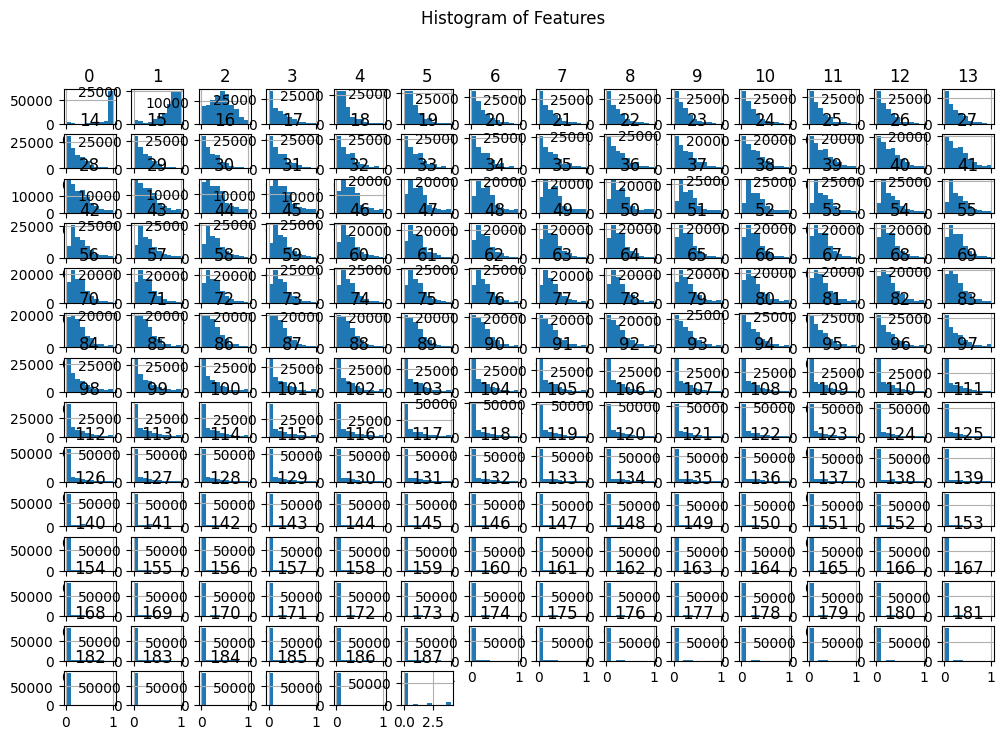

In [ ]:
train.hist(figsize=(12, 8))
plt.suptitle("Histogram of Features")
plt.show()

In [ ]:
print(test.columns)
print(test.describe())
print(test.isnull().sum())

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)
                0             1             2             3             4    \
count  21892.000000  21892.000000  21892.000000  21892.000000  21892.000000   
mean       0.894410      0.761902      0.426627      0.221596      0.201676   
std        0.234560      0.218659      0.228572      0.208711      0.177727   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.924260      0.683366      0.251197      0.050505      0.082873   
50%        0.990431      0.828996      0.432777      0.167630      0.147642   
75%        1.000000      0.912319      0.583991      0.347092      0.259211   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  21892.000000  21892.000000  21892.000000  2

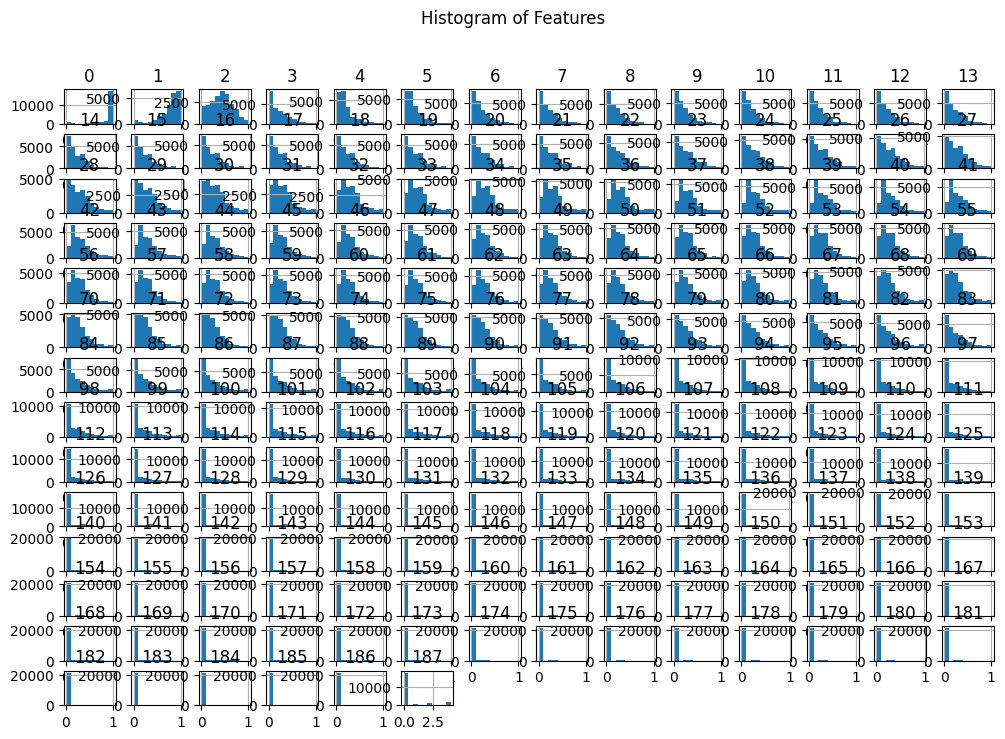

In [ ]:
test.hist(figsize=(12, 8))
plt.suptitle("Histogram of Features")
plt.show()

# **Data Preprocessing**

In [ ]:
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

In [ ]:
# Identify the minority classes
minority_classes = [0, 3]
# Perform SMOTE upsampling on the minority classes
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Print the new class counts
new_class_counts = pd.Series(y_train_resampled).value_counts()
print(new_class_counts)

0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: count, dtype: int64


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Perform PCA
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Modeling

In [ ]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(20,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#Training

In [ ]:
# Train the model
model.fit(X_train_pca, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/50
11324/11324 [==============================] - 53s 5ms/step - loss: 0.2685 - accuracy: 0.9058 - val_loss: 2.2388 - val_accuracy: 0.8369
Epoch 2/50
11324/11324 [==============================] - 32s 3ms/step - loss: 0.1583 - accuracy: 0.9462 - val_loss: 2.0334 - val_accuracy: 0.8682
Epoch 3/50
11324/11324 [==============================] - 29s 3ms/step - loss: 0.1318 - accuracy: 0.9556 - val_loss: 2.5337 - val_accuracy: 0.8697
Epoch 4/50
11324/11324 [==============================] - 32s 3ms/step - loss: 0.1165 - accuracy: 0.9610 - val_loss: 2.2188 - val_accuracy: 0.8785
Epoch 5/50
11324/11324 [==============================] - 32s 3ms/step - loss: 0.1077 - accuracy: 0.9641 - val_loss: 2.2235 - val_accuracy: 0.8886
Epoch 6/50
11324/11324 [==============================] - 27s 2ms/step - loss: 0.1002 - accuracy: 0.9665 - val_loss: 2.8542 - val_accuracy: 0.8687
Epoch 7/50
11324/11324 [==============================] - 32s 3ms/step - loss: 0.0957 - accuracy: 0.9681 - val_loss: 2

#Evaluation

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_pca)
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

685/685 [==============================] - 2s 2ms/step
Accuracy: 0.8979
F1-score: 0.6650
Precision: 0.6949
Recall: 0.6743


In [ ]:
# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model on the test set
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     18118
         1.0       0.62      0.02      0.03       556
         2.0       0.42      0.45      0.43      1448
         3.0       0.00      0.00      0.00       162
         4.0       0.98      0.66      0.79      1608

    accuracy                           0.87     21892
   macro avg       0.58      0.42      0.44     21892
weighted avg       0.86      0.87      0.86     21892



In [ ]:
# Apply different classification models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train_resampled)
    y_pred = model.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

    print(classification_report(y_test, y_pred))

Decision Tree Performance:
Accuracy: 0.62
Precision: 0.28
Recall: 0.33
F1-score: 0.28
              precision    recall  f1-score   support

         0.0       0.88      0.68      0.77     18118
         1.0       0.04      0.12      0.06       556
         2.0       0.13      0.31      0.19      1448
         3.0       0.04      0.16      0.07       162
         4.0       0.29      0.40      0.33      1608

    accuracy                           0.62     21892
   macro avg       0.28      0.33      0.28     21892
weighted avg       0.76      0.62      0.67     21892

Random Forest Performance:
Accuracy: 0.88
Precision: 0.63
Recall: 0.43
F1-score: 0.45
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     18118
         1.0       0.80      0.01      0.01       556
         2.0       0.45      0.41      0.43      1448
         3.0       0.00      0.00      0.00       162
         4.0       0.97      0.75      0.85      1608

    accuracy 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

SVM Performance:
Accuracy: 0.83
Precision: 0.17
Recall: 0.20
F1-score: 0.18
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     18118
         1.0       0.00      0.00      0.00       556
         2.0       0.00      0.00      0.00      1448
         3.0       0.00      0.00      0.00       162
         4.0       0.00      0.00      0.00      1608

    accuracy                           0.83     21892
   macro avg       0.17      0.20      0.18     21892
weighted avg       0.68      0.83      0.75     21892

Neural Network Performance:
Accuracy: 0.82
Precision: 0.50
Recall: 0.67
F1-score: 0.55
              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90     18118
         1.0       0.35      0.32      0.33       556
         2.0       0.50      0.61      0.55      1448
         3.0       0.26      0.67      0.38       162
         4.0       0.45      0.90      0.60      1608

    accuracy          